## Erin Rumelhart - Plotting Asteroids

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy.table import QTable

### The file `SDSS_MainBelt.csv` contains data on objects in the asteroid belt collected by the [Sloan Digital Sky Survey](http://www.sdss.org/).

The columns are:
- **`Name`** - Object name
- **`a`** - semi-major axis
- **`cA`** - SDSS a$^*$ color
- **`cI`** - SDSS i color (near infrared)
- **`cZ`** - SDSS z color (infrared)
- **`X`** - X position [au] - Sun-centered coords (10/29/2014)
- **`Y`** - Y position [au] - Sun-centered coords (10/29/2014)
- **`Z`** - Z position [au] - Sun-centered coords (10/29/2014)

## Read in the file `SDSS_MainBelt.csv`

In [121]:
mb_table = QTable.read('SDSS_MainBelt.csv', format='ascii.csv')

my_name = mb_table['Name']
my_cA = mb_table['cA']
my_cI = mb_table['cI']
my_cZ = mb_table['cZ']
my_semi_major = mb_table['a']
my_xpos = mb_table['X']
my_ypos = mb_table['Y']
my_zpos = mb_table['Z']

## The Color of the Asteroids 
- Make three (3) plots in one row
- In each panel, plot a histogram of the semi-major axis (`a`) for **all** of the asteroids.
- Bins = 100.
- Only show 2.0 AU < `a` < 3.6 AU
- In the first panel, overplot a histogram of `a` for C-Type asteroids only.
- In the first panel, overplot a histogram of `a` for S-Type asteroids only.
- In the first panel, overplot a histogram of `a` for V-Type asteroids only.
- In each panel, draw a vertical line at `a` = mean(`a`) for that type of asteroid.
- Adjust the color and transparency of the overplotted histograms so that it is easy to see.
- The asteroid types can be determined from their colors (see image below).
- Output size w:15in, h:5in
- Make the plot look nice (including clear labels)

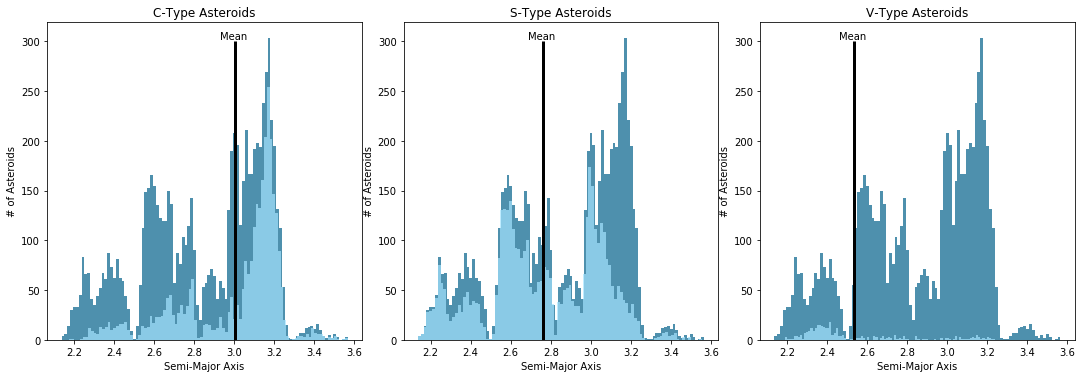

In [131]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

fig.tight_layout()

ax[0].set_xlabel("Semi-Major Axis")
ax[0].set_ylabel("# of Asteroids")
ax[0].set_title("C-Type Asteroids")

ax[1].set_xlabel("Semi-Major Axis")
ax[1].set_ylabel("# of Asteroids")
ax[1].set_title("S-Type Asteroids")

ax[2].set_xlabel("Semi-Major Axis")
ax[2].set_ylabel("# of Asteroids")
ax[2].set_title("V-Type Asteroids")

au_mask = np.where((2.0 < my_semi_major) & (my_semi_major < 3.6))
c_mask = np.where((my_cA < 0.0) & (2.0 < my_semi_major) & (my_semi_major < 3.6))
s_mask = np.where((my_cA > 0.0) & ((my_cI - my_cZ) > -0.15) & (2.0 < my_semi_major) & (my_semi_major < 3.6))
v_mask = np.where((my_cA > 0.0) & ((my_cI - my_cZ) < -0.15) & (2.0 < my_semi_major) & (my_semi_major < 3.6))

mean_c = sum(my_semi_major[c_mask]) / (my_semi_major[c_mask]).size
mean_s = sum(my_semi_major[s_mask]) / (my_semi_major[s_mask]).size
mean_v = sum(my_semi_major[v_mask]) / (my_semi_major[v_mask]).size

ax[0].hist(my_semi_major[au_mask], bins=100, facecolor='#4e90ad', histtype='stepfilled');
ax[0].hist(my_semi_major[c_mask], bins=100, facecolor='#a5e4ff', histtype='stepfilled', alpha = 0.70);
ax[0].vlines(mean_c, 0, 300, color='k', linewidth=3);
ax[0].text(2.93, 302, 'Mean', color='black', fontsize=10);

ax[1].hist(my_semi_major[au_mask], bins=100, facecolor='#4e90ad', histtype='stepfilled');
ax[1].hist(my_semi_major[s_mask], bins=100, facecolor='#a5e4ff', histtype='stepfilled', alpha = 0.70);
ax[1].vlines(mean_s, 0, 300, color='k', linewidth=3);
ax[1].text(2.685, 302, 'Mean', color='black', fontsize=10);

ax[2].hist(my_semi_major[au_mask], bins=100, facecolor='#4e90ad', histtype='stepfilled');
ax[2].hist(my_semi_major[v_mask], bins=100, facecolor='#a5e4ff', histtype='stepfilled', alpha = 0.70);
ax[2].vlines(mean_v, 0, 300, color='k', linewidth=3);
ax[2].text(2.46, 302, 'Mean', color='black', fontsize=10);

## The Position of the Asteroids 
- Make a 3D plot of X vs Y vs Z for the asteroids
- Orient the plot so you can see the 3D structure of the asteroid belt
- Output size w:9in, h:9in
- Make the plot look nice

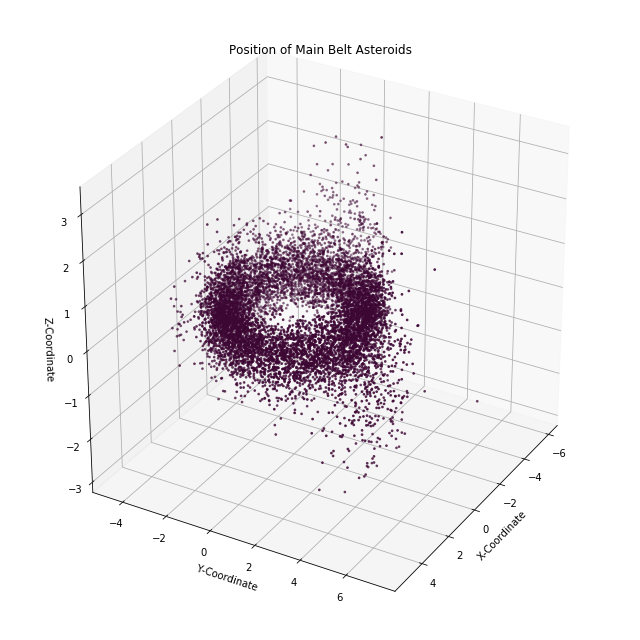

In [132]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

fig.set_size_inches(9,9)

fig.tight_layout()

ax.set_title("Position of Main Belt Asteroids")
ax.set_xlabel("X-Coordinate")
ax.set_ylabel("Y-Coordinate")
ax.set_zlabel("Z-Coordinate")

ax.scatter(my_xpos, my_ypos, my_zpos, c = "#3d0734", s=3)

ax.view_init(azim = 30, elev = 30)

---

### Asteroid classes - SDSS Colors

---

<center><img src="images/Colors.jpg" width=600px></center>

### Due Thurs Nov 02 - 5pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  